In [1]:
# Import necessary libraries.
# Creating the linear regression
import numpy as np
import pandas as pd

# Visualise the linear regression.
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Naming the DataFrame as reviews
reviews = pd.read_csv('turtle_reviews.csv')

# View reviews DataFrame and checking the metadata.
print(reviews)
print(reviews.info())

      gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  produ

In [3]:
# Check for any missing values
missing = reviews.isnull().sum()
print(missing)

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [4]:
# Descriptive Statistics of the reviews DataFrame
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [5]:
# Drop unnecessary Columns: Language and Platform
reviews1 = reviews.drop('language', axis=1)
reviews2 = reviews1.drop('platform', axis=1)
reviews2.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [6]:
# Change Column Headings for Renumeration and Spending_score for referencing purposes
reviews3 = reviews2.rename(columns={'remuneration (k£)': 'renumeration', 'spending_score (1-100)': 'spending_score'})
reviews3.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [7]:
# Save as CSV file
reviews3.to_csv('reviews.csv')

In [8]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [9]:
reviews = pd.read_csv('reviews.csv')
print(reviews)
reviews.info()

      Unnamed: 0  gender  age  renumeration  spending_score  loyalty_points  \
0              0    Male   18         12.30              39             210   
1              1    Male   23         12.30              81             524   
2              2  Female   22         13.12               6              40   
3              3  Female   25         13.12              77             562   
4              4  Female   33         13.94              40             366   
...          ...     ...  ...           ...             ...             ...   
1995        1995  Female   37         84.46              69            4031   
1996        1996  Female   43         92.66               8             539   
1997        1997    Male   34         92.66              91            5614   
1998        1998    Male   34         98.40              16            1048   
1999        1999    Male   32         92.66               8             479   

     education  product                            

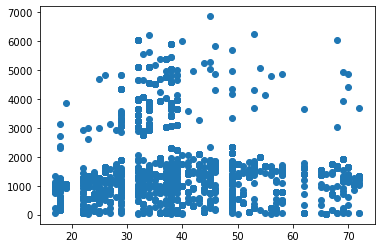

In [10]:
# Linear Regression for Age and Loyalty Points

# Define the dependent variable.
y = reviews['loyalty_points'] 

# Define the independent variable.
X = reviews['age']

# Check for linearity with Matplotlib.
plt.scatter(X, y)

In [11]:
# Create formula and pass through OLS methods.
f = 'y ~ X'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 22 Apr 2023   Prob (F-statistic):             0.0577
Time:                        08:22:37   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    1736.517739
X              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
X             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [13]:
# Create the linear regression model.
# Set the the coefficient to -4.012805 and the constant to 1736.517739.
y_pred = (1736.517739) - 4.012805 * reviews['age']

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

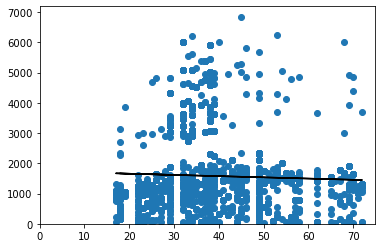

In [14]:
# Plot the data points with a scatterplot.
plt.scatter(X, y)

# Plot the regression line (in black).
plt.plot(X, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

# The flat line showing no relation with age and loyalty points

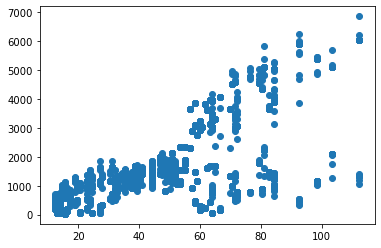

In [15]:
# Linear Regression for Renumeration and Loyalty Points

# Define the dependent variable.
y = reviews['loyalty_points'] 

# Define the independent variable.
X = reviews['renumeration']

# Check for linearity with Matplotlib.
plt.scatter(X, y)

In [16]:
# Create formula and pass through OLS methods.
f = 'y ~ X'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 22 Apr 2023   Prob (F-statistic):          2.43e-209
Time:                        08:22:38   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -65.686513
X            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
X             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [18]:
# Create the linear regression model.
# Set the the coefficient to 34.187825 and the constant to -65.686513.
y_pred = (-65.686513) + 34.187825 * reviews['renumeration']

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: renumeration, Length: 2000, dtype: float64

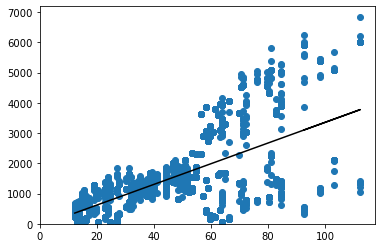

In [19]:
# Plot the data points with a scatterplot.
plt.scatter(X, y)

# Plot the regression line (in black).
plt.plot(X, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

# This shows a positive correlation with renumeration and loyalty points

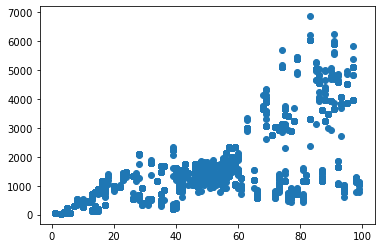

In [20]:
# Linear Regression for Spending Score and Loyalty Points

# Define the dependent variable.
y = reviews['loyalty_points'] 

# Define the independent variable.
X = reviews['spending_score']

# Check for linearity with Matplotlib.
plt.scatter(X, y)

In [21]:
# Create formula and pass through OLS methods.
f = 'y ~ X'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 22 Apr 2023   Prob (F-statistic):          2.92e-263
Time:                        08:22:39   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -75.052663
X            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
X             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [23]:
# Create the linear regression model.
# Set the the coefficient to 33.061693 and the constant to -75.052663.
y_pred = (-75.052663) + 33.061693 * reviews['spending_score']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

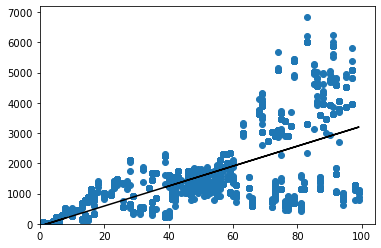

In [24]:
# Plot the data points with a scatterplot.
plt.scatter(X, y)

# Plot the regression line (in black).
plt.plot(X, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

# This shows a positive correlation with spending score and loyalty points

In [25]:
# Import all the necessary packages.
import numpy as np
import pandas as pd

import warnings  
warnings.filterwarnings('ignore')

# Import the reviews data into Python and name df.
df = pd.read_csv('reviews.csv')

# View the output.
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   renumeration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB
None


,Unnamed: 0,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [26]:
# Renumeration and Spending Score only
df2 = df[['renumeration', 'spending_score']]
print(df2)

      renumeration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
...            ...             ...
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

[2000 rows x 2 columns]


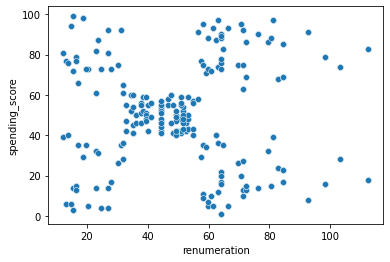

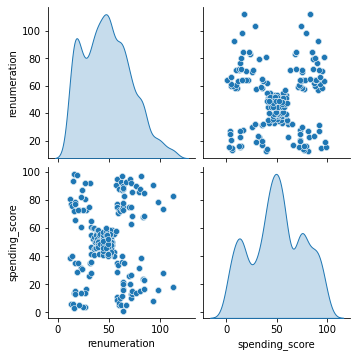

In [27]:
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Renumeration and Spending Score Plot
# Create a scatterplot with Seaborn.
sns.scatterplot(x='renumeration',
                y='spending_score',
                data=df2)

# Create a pairplot with Seaborn.
x = df[['renumeration', 'spending_score']]

sns.pairplot(df,
             vars=x,
             diag_kind= 'kde')

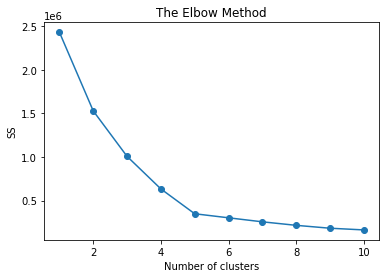

In [28]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

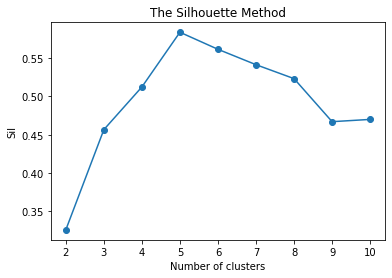

In [29]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

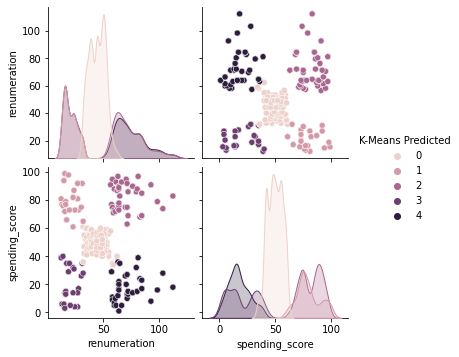

In [30]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [31]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

In [32]:
# View the K-Means predicted.
print(x.head())

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  1
2         13.12               6                  3
3         13.12              77                  1
4         13.94              40                  3


<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

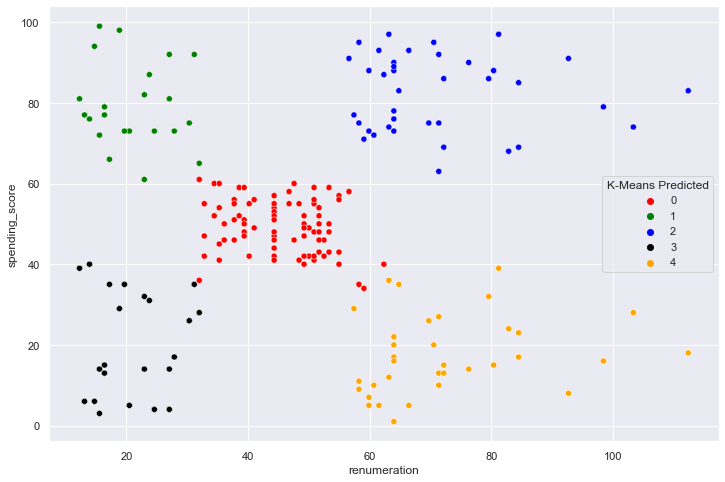

In [33]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='renumeration' , 
                y ='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

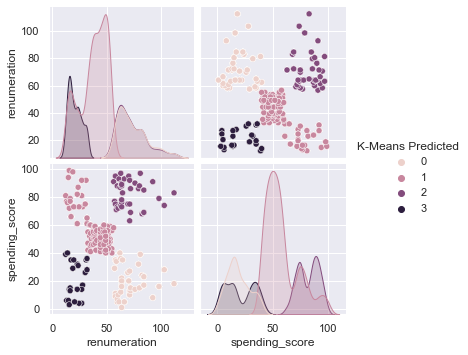

In [34]:
# Use 4 Clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [35]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    1013
2     356
0     351
3     280
Name: K-Means Predicted, dtype: int64

In [36]:
# View the K-Means predicted.
print(x.head())

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  1
2         13.12               6                  3
3         13.12              77                  1
4         13.94              40                  3


<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

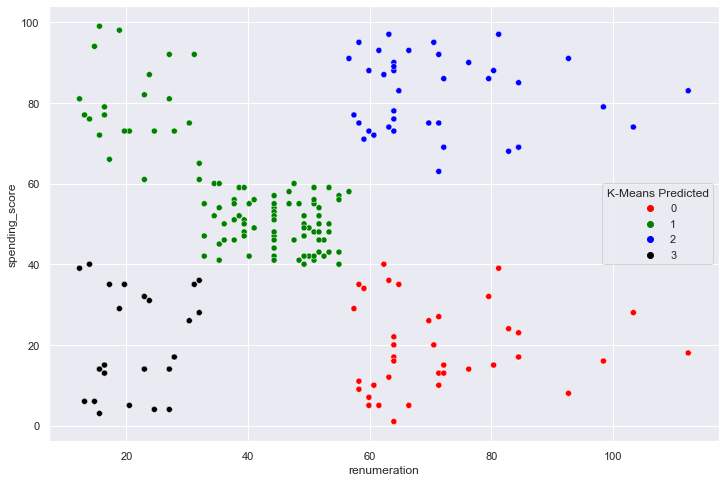

In [37]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='renumeration' , 
                y ='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

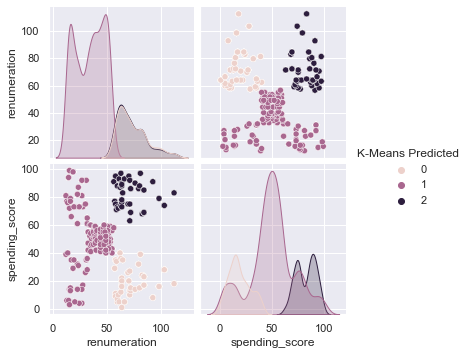

In [38]:
# Use 3 clusters:
kmeans = KMeans(n_clusters = 3,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [39]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    1293
2     356
0     351
Name: K-Means Predicted, dtype: int64

In [40]:
# View the K-Means predicted.
print(x.head())

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  1
2         13.12               6                  1
3         13.12              77                  1
4         13.94              40                  1


<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

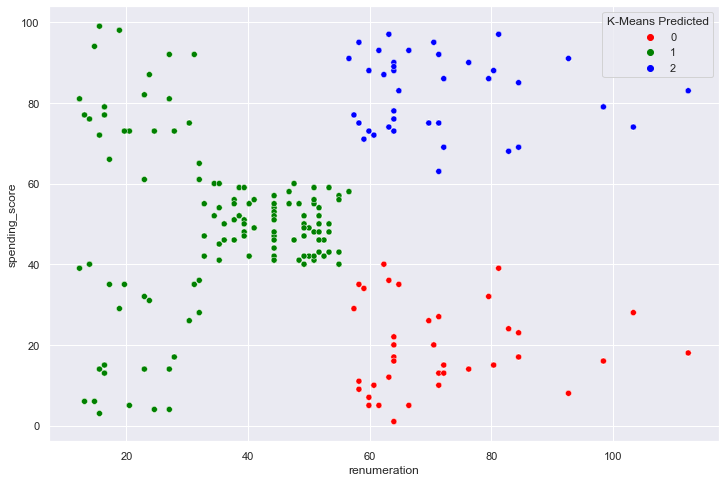

In [41]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='renumeration' , 
                y ='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue'])

In [42]:
# Therefore using 5 clusters as a result of general share of clusters being 
# broadly equal apart from the middle cluster.

In [43]:
# Import necessary libraries.
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Import the reviews data into Python.
df = pd.read_csv('reviews.csv')

# View the output.
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   renumeration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB
None


,Unnamed: 0,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [44]:
# Review and Summary columns only
df2 = df[['review', 'summary']]
print(df2)

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4

In [45]:
# Check for any missing values
missing = df2.isnull().sum()
print(missing)

review     0
summary    0
dtype: int64


In [46]:
# Change to lower case to prepare for Natural Language Processing
df2['review'] = df2['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2['summary'] = df2['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))
print(df2)

                                                 review  \
0     when it comes to a dm's screen, the space on t...   
1     an open letter to galeforce9*: your unpainted ...   
2     nice art, nice printing. why two panels are fi...   
3     amazing buy! bought it as a gift for our new d...   
4     as my review of gf9's previous screens these w...   
...                                                 ...   
1995  the perfect word game for mixed ages (with mom...   
1996  great game. did not think i would like it when...   
1997  great game for all......... keeps the mind nim...   
1998                                          fun game!   
1999  this game is fun. a lot like scrabble without ...   

                                                summary  
0     the fact that 50% of this space is wasted on a...  
1     another worthless dungeon master's screen from...  
2                       pretty, but also pretty useless  
3                                            five stars  
4

In [47]:
# Replace puntuation to prepare for Natural Language Processing
df2['review'] = df2['review'].str.replace(r'[^\w\s]+', '')
df2['summary'] = df2['summary'].str.replace(r'[^\w\s]+', '')
print(df2)

                                                 review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game did not think i would like it when ...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4

In [48]:
# Check the number of duplicate values in the review column.
df2.review.duplicated().sum()

50

In [49]:
# Check the number of duplicate values in the summary column.
df2.summary.duplicated().sum()

649

In [50]:
# Drop duplicates for review.
df2 = df2.drop_duplicates(subset=['review'])

# Preview data.
df2.reset_index(inplace=True)
df2.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [51]:
# Drop duplicates for summary.
df3 = df2.drop_duplicates(subset=['summary'])

# Preview data.
df3.reset_index(inplace=True)
df3.head()

,level_0,index,review,summary
0,0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,4,as my review of gf9s previous screens these we...,money trap


In [52]:
# String all the comments together in a single variable.
# Create an empty string variable.
all_review = ''
for i in range(df2.shape[0]):
    # Add each comment.
    all_review = all_review + df2['review'][i]

In [53]:
# String all the comments together in a single variable.
# Create an empty string variable.
all_summary = ''
for i in range(df2.shape[0]):
    # Add each comment.
    all_summary = all_summary + df2['summary'][i]

In [54]:
# Install WordCloud
!pip install WordCloud


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


In [55]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

In [56]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_review) 

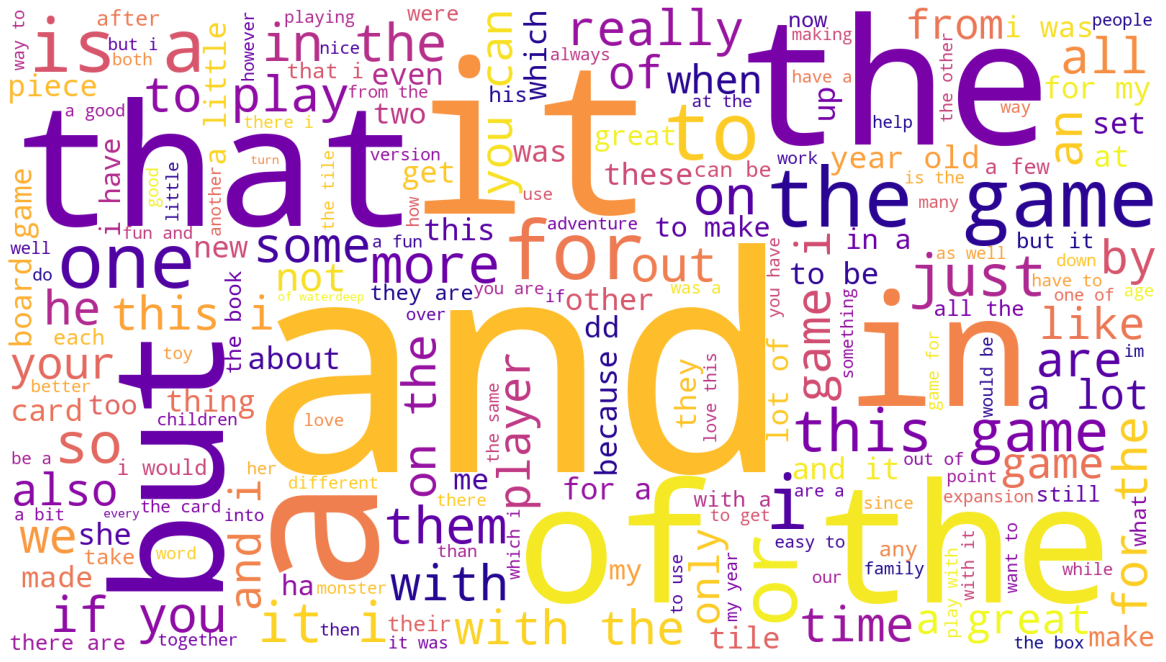

In [57]:
# Plot the Review WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [58]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary) 

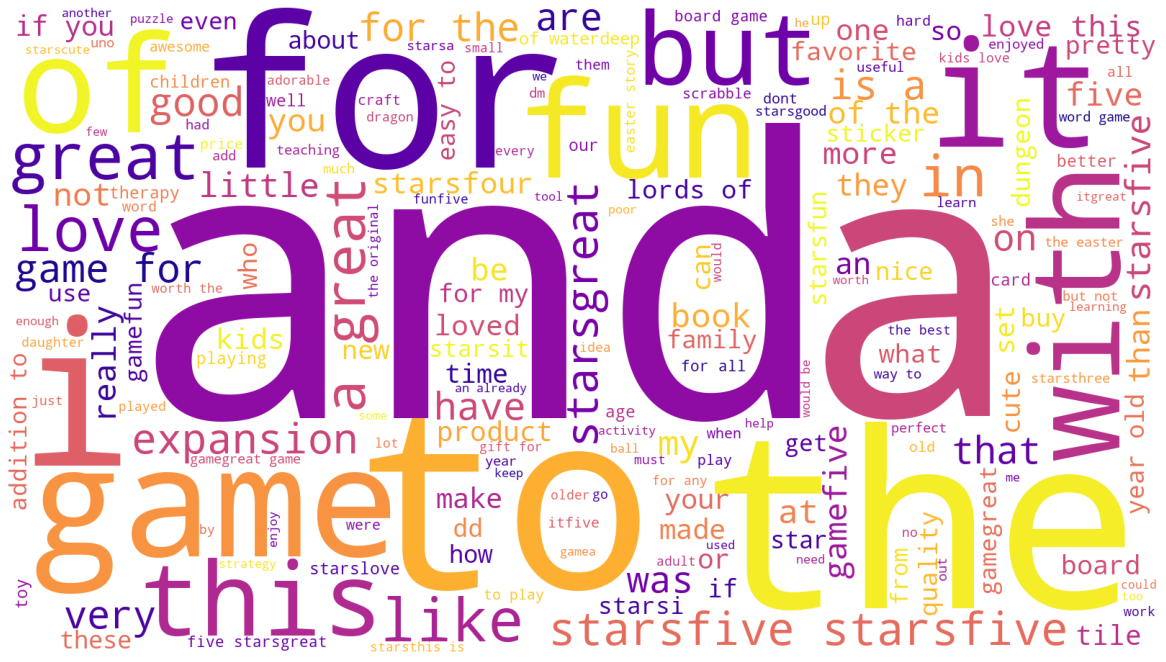

In [59]:
# Plot the Summary WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [60]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/benjamingood/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [61]:
# Tokenise the words. (Review)
df2['review_tokens'] = df2['review'].apply(word_tokenize)

# Preview data.
df2['review_tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review_tokens, dtype: object

In [62]:
# Tokenise the words. (Summary)
df2['summary_tokens'] = df2['summary'].apply(word_tokenize)

# Preview data.
df2['summary_tokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary_tokens, dtype: object

In [63]:
# Define an empty list of tokens. (Review)
all_review_tokens = []

for i in range(df2.shape[0]):
    # Add each token to the list.
    all_review_tokens = all_review_tokens + df2['review_tokens'][i]

In [64]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist_review = FreqDist(all_review_tokens)

# Preview data.
fdist_review

FreqDist({'the': 5449, 'and': 3233, 'to': 3162, 'a': 3159, 'of': 2487, 'i': 2089, 'it': 2082, 'is': 1781, 'this': 1774, 'game': 1668, ...})

In [65]:
# Define an empty list of tokens. (Summary)
all_summary_tokens = []

for i in range(df2.shape[0]):
    # Add each token to the list.
    all_summary_tokens = all_summary_tokens + df2['summary_tokens'][i]

In [66]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist_summary = FreqDist(all_summary_tokens)

# Preview data.
fdist_summary

FreqDist({'stars': 420, 'five': 338, 'game': 319, 'great': 294, 'the': 260, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

In [67]:
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
review_tokens2 = [x for x in all_review_tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
review_tokens2_string = ''

for value in all_review_tokens:
    # Add each filtered token word to the string.
    review_tokens2_string = review_tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/benjamingood/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


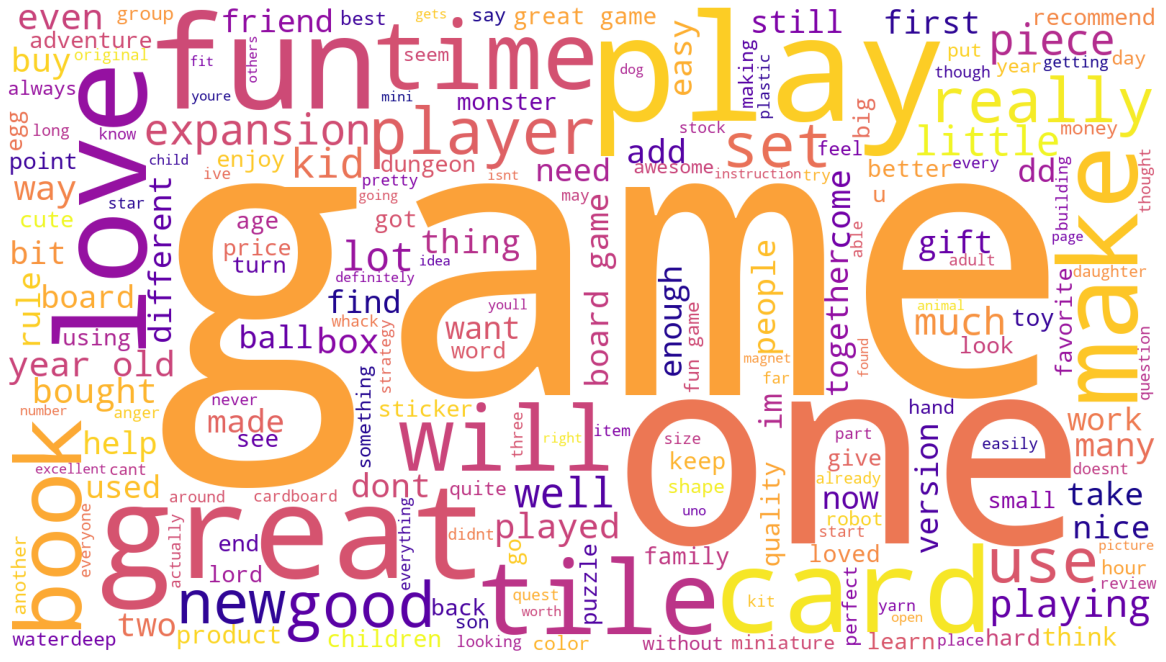

In [68]:
# Create a WordCloud. (Review)
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(review_tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [69]:
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
summary_tokens2 = [x for x in all_summary_tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
summary_tokens2_string = ''

for value in all_summary_tokens:
    # Add each filtered token word to the string.
    summary_tokens2_string = summary_tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/benjamingood/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


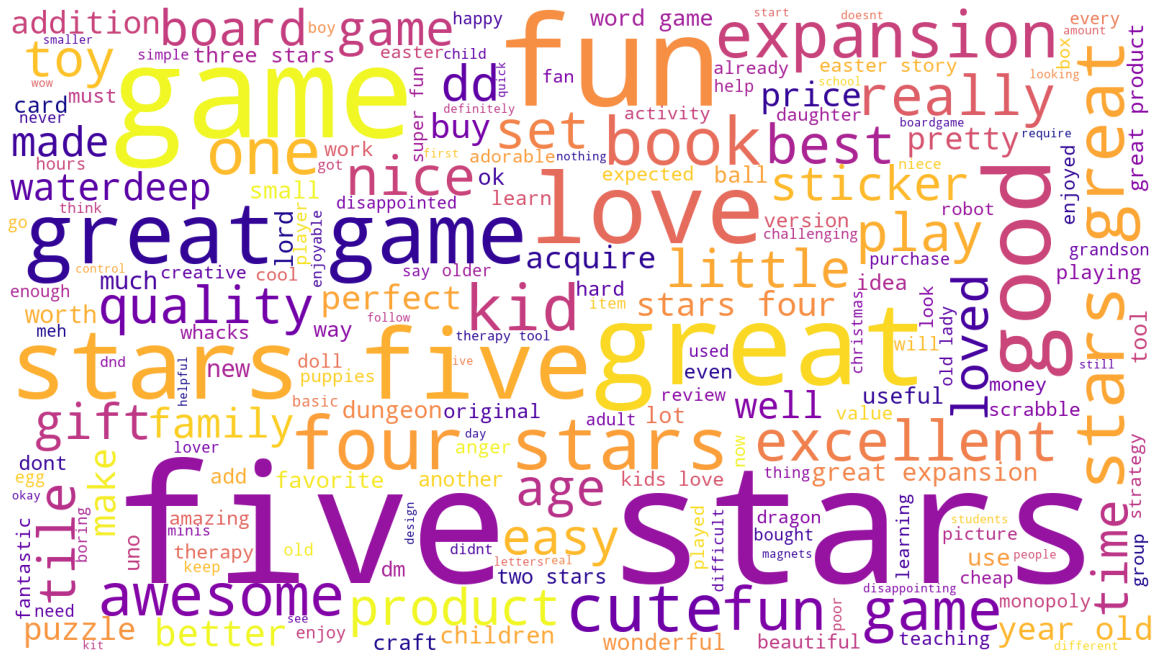

In [70]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(summary_tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [71]:
# View the frequency distribution.
fdist_review = FreqDist(review_tokens2)

# Preview the data.
fdist_review

FreqDist({'game': 1668, 'great': 579, 'fun': 549, 'one': 530, 'play': 502, 'like': 414, 'love': 322, 'really': 319, 'get': 319, 'cards': 301, ...})

In [72]:
# View the frequency distribution.
fdist_summary = FreqDist(summary_tokens2)

# Preview the data.
fdist_summary

FreqDist({'stars': 420, 'five': 338, 'game': 319, 'great': 294, 'fun': 218, 'love': 92, 'good': 91, 'four': 56, 'like': 54, 'expansion': 52, ...})

In [73]:
# Import the Counter class. 
from collections import Counter

# Generate a DataFrame from Counter. (Review)
review_counts = pd.DataFrame(Counter(review_tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
review_counts

,Frequency
Word,
game,1668
great,579
fun,549
one,530
play,502
like,414
love,322
really,319
get,319


In [74]:
# Import the Counter class. 
from collections import Counter

# Generate a DataFrame from Counter. (Summary)
summary_counts = pd.DataFrame(Counter(summary_tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
summary_counts

,Frequency
Word,
stars,420
five,338
game,319
great,294
fun,218
love,92
good,91
four,56
like,54


In [75]:
# Import the necessary package
from textblob import TextBlob

# Define a function to extract a polarity score for the comment.
def generate_polarity(review):
    return TextBlob(review).sentiment[0]

# Populate a new column with polarity scores for each comment.
df2['review_polarity'] = df2['review'].apply(generate_polarity)

# Preview the result.
df2['review_polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: review_polarity, dtype: float64

In [76]:
# Define a function to extract a polarity score for the comment.
def generate_polarity(summary):
    return TextBlob(summary).sentiment[0]

# Populate a new column with polarity scores for each comment.
df2['summary_polarity'] = df2['summary'].apply(generate_polarity)

# Preview the result.
df2['summary_polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: summary_polarity, dtype: float64

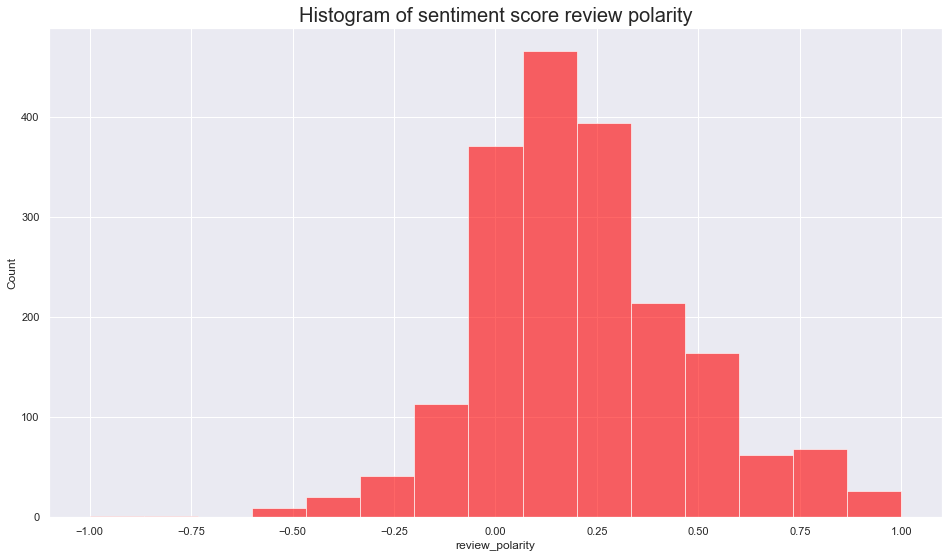

In [77]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df2['review_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('review_polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score review polarity', fontsize=20)

plt.show()

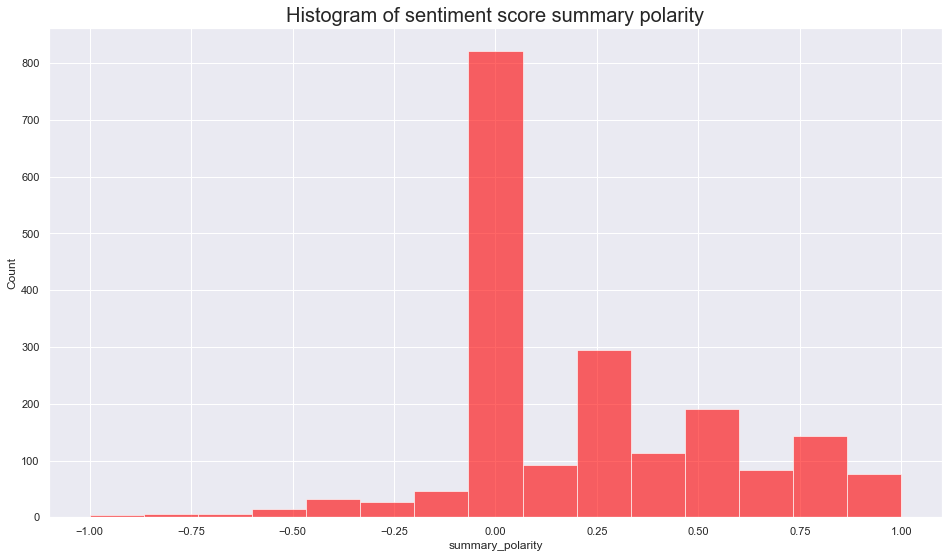

In [78]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df2['summary_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('summary_polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score summary polarity', fontsize=20)

plt.show()

In [79]:
# Postive Review Sentiment
review_positive_sentiment = df2.nlargest(20, 'review_polarity')
review_positive_sentiment

,index,review,summary,review_tokens,summary_tokens,review_polarity,summary_polarity
7,7,came in perfect condition,five stars,"[came, in, perfect, condition]","[five, stars]",1.0,0.0
164,165,awesome book,five stars,"[awesome, book]","[five, stars]",1.0,0.0
193,194,awesome gift,five stars,"[awesome, gift]","[five, stars]",1.0,0.0
489,496,excellent activity for teaching selfmanagement...,five stars,"[excellent, activity, for, teaching, selfmanag...","[five, stars]",1.0,0.0
517,524,perfect just what i ordered,five stars,"[perfect, just, what, i, ordered]","[five, stars]",1.0,0.0
583,591,wonderful product,five stars,"[wonderful, product]","[five, stars]",1.0,0.0
601,609,delightful product,five stars,"[delightful, product]","[five, stars]",1.0,0.0
613,621,wonderful for my grandson to learn the resurre...,five stars,"[wonderful, for, my, grandson, to, learn, the,...","[five, stars]",1.0,0.0
782,790,perfect,aquire game,[perfect],"[aquire, game]",1.0,-0.4
922,933,awesome,five stars,[awesome],"[five, stars]",1.0,0.0


In [80]:
# Negative Review Sentiment
review_negative_sentiment = df2.nsmallest(20, 'review_polarity')

review_negative_sentiment

,index,review,summary,review_tokens,summary_tokens,review_polarity,summary_polarity
207,208,booo unles you are patient know how to measure...,boring unless you are a craft person which i am,"[booo, unles, you, are, patient, know, how, to...","[boring, unless, you, are, a, craft, person, w...",-1.000000,-1.00
181,182,incomplete kit very disappointing,incomplete kit,"[incomplete, kit, very, disappointing]","[incomplete, kit]",-0.780000,0.00
1766,1804,im sorry i just find this product to be boring...,disappointing,"[im, sorry, i, just, find, this, product, to, ...",[disappointing],-0.583333,-0.60
362,364,one of my staff will be using this game soon s...,anger control game,"[one, of, my, staff, will, be, using, this, ga...","[anger, control, game]",-0.550000,-0.55
116,117,i bought this as a christmas gift for my grand...,stickers,"[i, bought, this, as, a, christmas, gift, for,...",[stickers],-0.500000,0.00
226,227,this was a gift for my daughter i found it dif...,two stars,"[this, was, a, gift, for, my, daughter, i, fou...","[two, stars]",-0.500000,0.00
229,230,i found the directions difficult,three stars,"[i, found, the, directions, difficult]","[three, stars]",-0.500000,0.00
289,290,instructions are complicated to follow,two stars,"[instructions, are, complicated, to, follow]","[two, stars]",-0.500000,0.00
300,301,difficult,three stars,[difficult],"[three, stars]",-0.500000,0.00
1496,1524,expensive for what you get,two stars,"[expensive, for, what, you, get]","[two, stars]",-0.500000,0.00


In [81]:
# Positive Summary Sentiment
summary_positive_sentiment = df2.nlargest(20, 'summary_polarity')

summary_positive_sentiment

,index,review,summary,review_tokens,summary_tokens,review_polarity,summary_polarity
6,6,i have bought many gm screens over the years b...,best gm screen ever,"[i, have, bought, many, gm, screens, over, the...","[best, gm, screen, ever]",0.660000,1.0
28,28,these are intricate designs for older children...,wonderful designs,"[these, are, intricate, designs, for, older, c...","[wonderful, designs]",0.541667,1.0
32,32,awesome my 8 year olds favorite xmas gift its ...,perfect,"[awesome, my, 8, year, olds, favorite, xmas, g...",[perfect],0.750000,1.0
80,80,my daughter loves these little books theyre th...,theyre the perfect size to keep in the car or ...,"[my, daughter, loves, these, little, books, th...","[theyre, the, perfect, size, to, keep, in, the...",0.406250,1.0
133,134,this occupied my almost3 year old for nearly a...,perfect for preschooler,"[this, occupied, my, almost3, year, old, for, ...","[perfect, for, preschooler]",0.090476,1.0
139,140,i bought 8 of these for my 3 year old daughter...,awesome sticker activity for the price,"[i, bought, 8, of, these, for, my, 3, year, ol...","[awesome, sticker, activity, for, the, price]",0.318750,1.0
160,161,my 8 year old son loves this drawing book love...,awesome book,"[my, 8, year, old, son, loves, this, drawing, ...","[awesome, book]",0.100000,1.0
162,163,this was a christmas present for a nephew who ...,he was very happy with his gift,"[this, was, a, christmas, present, for, a, nep...","[he, was, very, happy, with, his, gift]",0.500000,1.0
186,187,great product took a little practice and time ...,awesome,"[great, product, took, a, little, practice, an...",[awesome],0.326042,1.0
209,210,i was skeptical but my 9 year old has had so m...,awesome and welldesigned for 9 year olds,"[i, was, skeptical, but, my, 9, year, old, has...","[awesome, and, welldesigned, for, 9, year, olds]",0.192222,1.0


In [82]:
# Negative Summary Sentiment
summary_negative_sentiment = df2.nsmallest(20, 'summary_polarity')

summary_negative_sentiment

,index,review,summary,review_tokens,summary_tokens,review_polarity,summary_polarity
21,21,these are cute tatoos for those who love pirat...,the worst value ive ever seen,"[these, are, cute, tatoos, for, those, who, lo...","[the, worst, value, ive, ever, seen]",0.050000,-1.000000
207,208,booo unles you are patient know how to measure...,boring unless you are a craft person which i am,"[booo, unles, you, are, patient, know, how, to...","[boring, unless, you, are, a, craft, person, w...",-1.000000,-1.000000
818,829,ive discovered that im really new school when ...,boring,"[ive, discovered, that, im, really, new, schoo...",[boring],0.156399,-1.000000
1147,1166,before this i hated running any rpg campaign d...,before this i hated running any rpg campaign d...,"[before, this, i, hated, running, any, rpg, ca...","[before, this, i, hated, running, any, rpg, ca...",-0.133333,-0.900000
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.800000
143,144,my kids grew up with a peg bench and hammer an...,disappointed,"[my, kids, grew, up, with, a, peg, bench, and,...",[disappointed],0.108173,-0.750000
623,631,eggs split and were unusable,disappointed,"[eggs, split, and, were, unusable]",[disappointed],0.000000,-0.750000
785,793,my mom already owned an acquire game but she a...,disappointed,"[my, mom, already, owned, an, acquire, game, b...",[disappointed],-0.046364,-0.750000
1584,1620,i was thinking it was a puppet but it is not i...,disappointed,"[i, was, thinking, it, was, a, puppet, but, it...",[disappointed],-0.218750,-0.750000
361,363,i found that this card game does the opposite ...,promotes anger instead of teaching calming met...,"[i, found, that, this, card, game, does, the, ...","[promotes, anger, instead, of, teaching, calmi...",-0.126190,-0.700000


In [83]:
# The data resultant from the frequency distributions, positive and negative sentiment can help inform the 
# marketing team for Turtle Games gain insight on the thoughts of the customer and this can help influence 
# marketing strategy